In [2]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
#open and parse files for necessary data --> testing for 1 .out file to make sure everything can run
#utilized Derek's parse code and made adjustments
with open('./0.out') as f:
    lines = f.read().splitlines()

    edge_weight_array = []
    time_array = []

    for line in lines:
        edge_weight_pat = "tw: Edge From Node (\d{3}) to Node (\d{3}) ; Edge Speed : 0.5000000000000000000000 ; Edge Weight: ([\d\.-]+) ; Current Time: ([\d\.]+)"
        matches = re.search(edge_weight_pat, line)
        if matches:
            #matches in order of info is extracted
            match_list1 = (float(matches.group(3)))
            match_list2 = (float(matches.group(4)))
            
            #adds elements from .out file to the empty list
            edge_weight_array.append(match_list1)
            time_array.append(match_list2)
            
print(edge_weight_array)
print(time_array)
print(len(edge_weight_array))

[1.3032374407489644, 1.6835924491165333, -0.6985804193451078, -0.5668673839393984, 0.7448997080384283, 1.4867237815108691, 0.154903913955262, 0.5432393565497208, 1.9743325644607572, 1.3964734757976789, 1.5810560113881573, 0.5206438791018435, 1.3735824986165874, -0.1884447889632107, 1.4361980274477404, 1.203416326943568, 1.069792335213242, 0.30788953866213653, -1.243525335759967, 1.9900562546625529, 0.8169352006171339, -0.8287012134444355, 1.5629470502306857, 0.8214863108925414, -0.7587927480864182, 0.17993121107625895, 1.9771912714446866, 0.16142234949042614, 1.9270919116489704, 1.9192771845076717, 1.361457010215854, 1.7131890781500365, 0.9323873510320525, 0.45645060329804377, -0.6762914980793561, 0.1284563884238664, -0.6432783508798562, 1.6579098538069315, -0.36349275867696484, 0.6370596279384328, -1.950557413615424, 0.6878140606596118, -1.7590756347240517, 1.8577850148773156, 0.8937349345618918, 0.5731316145644876, 1.7507135110155447, 1.8429606179484543, 0.7755139954181857, 0.4914033

In [22]:
#turning into array
ta1 = np.asarray(time_array)
edw1 = np.asarray(edge_weight_array)

#converting elements into float data type
ta = ta1.astype(float)
edw = edw1.astype(float)

#equating edge weights from a specific time frame (90 weights for connection of 1 specific node to another per time point)
y0 = pd.Series(edw[ta==0.00])
print(y0) #testing for sanity


0     1.303237
1     1.683592
2    -0.698580
3    -0.566867
4     0.744900
        ...   
85    0.724469
86    0.131374
87    0.710077
88   -0.595289
89    1.153353
Length: 90, dtype: float64


0     1.300937
1     1.678119
2    -0.699577
3    -0.567715
4     0.742921
        ...   
85    0.722290
86    0.129638
87    0.708346
88   -0.596079
89    1.149709
Length: 90, dtype: float64
-0.005473793980175667
0.0010515395525823035


(array([ 85.13826194,  85.13826194,  85.13826194,  85.13826194,
         85.13826194,   0.        ,  85.13826194, 340.55304776,
        170.27652388,   0.        ,   0.        , 255.41478582,
         85.13826194, 255.41478582,  85.13826194, 170.27652388,
         85.13826194,   0.        , 425.6913097 , 255.41478582,
        255.41478582, 170.27652388, 170.27652388,  85.13826194,
        340.55304776, 595.96783358, 255.41478582, 255.41478582,
        510.82957164, 255.41478582, 425.6913097 , 170.27652388,
         85.13826194,  85.13826194, 170.27652388, 255.41478582,
         85.13826194,   0.        , 170.27652388,  85.13826194,
          0.        ,  85.13826194,   0.        , 170.27652388,
          0.        ,   0.        ,  85.13826194,  85.13826194,
          0.        , 170.27652388]),
 array([-5.47379398e-03, -5.34328731e-03, -5.21278064e-03, -5.08227397e-03,
        -4.95176730e-03, -4.82126063e-03, -4.69075396e-03, -4.56024729e-03,
        -4.42974061e-03, -4.29923394e-03, 

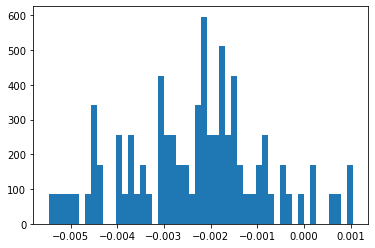

In [29]:
y1 = pd.Series(edw[ta==2.0000000000000004])
print(y1)

#scale the index properly - from Vivek's and Vikash's code!
y0.reset_index(inplace=True, drop=True)
y1.reset_index(inplace=True, drop=True)

dat = y1-y0
#getting range by finding the min and max
dat_min1 = min(dat)
dat_max1 = max(dat)

#sanity check
print(dat_min)
print(dat_max)

#FINALLY! :D
plt.hist(dat, density = True, range = (dat_min1, dat_max1), bins = 50)

0     1.301763
1     1.679862
2    -0.699230
3    -0.567250
4     0.743820
        ...   
85    0.723114
86    0.130271
87    0.709153
88   -0.595818
89    1.150786
Length: 90, dtype: float64


(array([122.42439959,   0.        , 244.84879918,   0.        ,
          0.        ,   0.        , 244.84879918, 122.42439959,
          0.        , 489.69759835, 367.27319877, 244.84879918,
        367.27319877, 367.27319877, 244.84879918,   0.        ,
          0.        ,   0.        , 122.42439959, 489.69759835,
        612.12199794, 122.42439959, 367.27319877, 367.27319877,
        244.84879918, 612.12199794, 489.69759835, 489.69759835,
        489.69759835, 367.27319877, 612.12199794, 489.69759835,
        244.84879918, 244.84879918,   0.        , 367.27319877,
        244.84879918,   0.        , 122.42439959, 122.42439959,
        122.42439959, 122.42439959,   0.        , 244.84879918,
          0.        ,   0.        , 122.42439959, 122.42439959,
          0.        , 244.84879918]),
 array([-3.73026612e-03, -3.63950716e-03, -3.54874820e-03, -3.45798924e-03,
        -3.36723028e-03, -3.27647132e-03, -3.18571237e-03, -3.09495341e-03,
        -3.00419445e-03, -2.91343549e-03, 

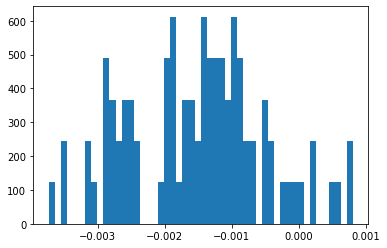

In [33]:
y3 = pd.Series(edw[ta==0.9999999999999999])
print(y3)
y3.reset_index(inplace=True, drop=True)

dat2 = y3-y0
dat_min3 = min(dat2)
dat_max3 = max(dat2)
plt.hist(dat2, density = True, range = (dat_min3, dat_max3), bins = 50)

0     1.301763
1     1.679862
2    -0.699230
3    -0.567250
4     0.743820
        ...   
85    0.723114
86    0.130271
87    0.709153
88   -0.595818
89    1.150786
Length: 90, dtype: float64


(array([122.42439959,   0.        , 244.84879918,   0.        ,
          0.        ,   0.        , 244.84879918, 122.42439959,
          0.        , 489.69759835, 367.27319877, 244.84879918,
        367.27319877, 367.27319877, 244.84879918,   0.        ,
          0.        ,   0.        , 122.42439959, 489.69759835,
        612.12199794, 122.42439959, 367.27319877, 367.27319877,
        244.84879918, 612.12199794, 489.69759835, 489.69759835,
        489.69759835, 367.27319877, 612.12199794, 489.69759835,
        244.84879918, 244.84879918,   0.        , 367.27319877,
        244.84879918,   0.        , 122.42439959, 122.42439959,
        122.42439959, 122.42439959,   0.        , 244.84879918,
          0.        ,   0.        , 122.42439959, 122.42439959,
          0.        , 244.84879918]),
 array([-3.73026612e-03, -3.63950716e-03, -3.54874820e-03, -3.45798924e-03,
        -3.36723028e-03, -3.27647132e-03, -3.18571237e-03, -3.09495341e-03,
        -3.00419445e-03, -2.91343549e-03, 

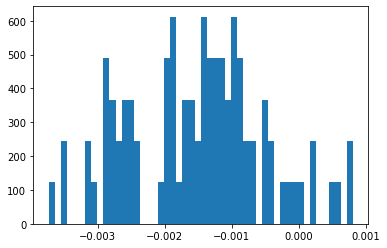

In [34]:
y3 = pd.Series(edw[ta==1.5000000000000002])
print(y2)
y2.reset_index(inplace=True, drop=True)

dat3 = y2-y0
dat_min2 = min(dat1)
dat_max2 = max(dat1)
plt.hist(dat3, density = True, range = (dat_min2, dat_max2), bins = 50)

0     1.303237
1     1.683592
2    -0.698580
3    -0.566867
4     0.744900
        ...   
85    0.724469
86    0.131374
87    0.710077
88   -0.595289
89    1.153353
Length: 90, dtype: float64


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

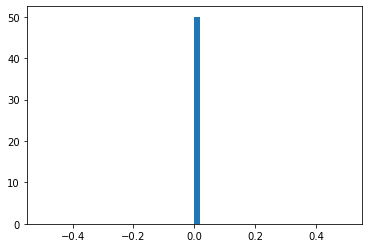

In [35]:
y4 = pd.Series(edw[ta==0.1])
print(y4)
y4.reset_index(inplace=True, drop=True)

dat4 = y4-y0
dat_min2 = min(dat4)
dat_max2 = max(dat4)
plt.hist(dat4, density = True, range = (dat_min2, dat_max2), bins = 50)